#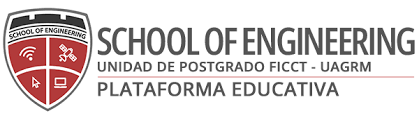

**Maestría en Ciencia de Datos e Inteligencia Artificial V1E4**
##MÓDULO 5 - Análisis Estadístico de Datos
##EDA - Análisis Exploratorio de Datos

**Universidad Autónoma Gabriel René Moreno de Santa Cruz de la Sierra-Bolivia UAGRM - POSTGRADO**<br/>
**Películas y Actores - Analisis multivariado Aplicado al rubro Cinematográfico**<br/>



Cargamos los datos...

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import pi

In [2]:
pelis = pd.read_csv("/content/titles.csv")
cast = pd.read_csv("/content/cast.csv", delimiter="|")

In [3]:
pelis.head()

,title,year,rating,votes
0,Spanish Fiesta,2019,6.9,29
1,La tierra de los toros,2000,5.4,14
2,Dama de noche,1993,6.0,25
3,Frivolinas,2014,5.6,19
4,Mya ga naing,1996,7.5,21


In [4]:
cast.head()

,name,title,year,rating,votes;;
0,Ève Francis,Spanish Fiesta,2019.0,6.9,29;;
1,Gabriel Gabrio,Spanish Fiesta,2019.0,6.9,29;;
2,Jean Toulout,Spanish Fiesta,2019.0,6.9,29;;
3,Gaston Modot,Spanish Fiesta,2019.0,6.9,29;;
4,Antonio Cañero,La tierra de los toros,2000.0,5.4,14;;


In [5]:
cast['votes;;'] = cast['votes;;'].str.replace(';', '')
cast['votes;;'] = pd.to_numeric(cast['votes;;'])
cast = cast.rename(columns={"votes;;":"votes"})
cast.head()

,name,title,year,rating,votes
0,Ève Francis,Spanish Fiesta,2019.0,6.9,29.0
1,Gabriel Gabrio,Spanish Fiesta,2019.0,6.9,29.0
2,Jean Toulout,Spanish Fiesta,2019.0,6.9,29.0
3,Gaston Modot,Spanish Fiesta,2019.0,6.9,29.0
4,Antonio Cañero,La tierra de los toros,2000.0,5.4,14.0


In [6]:
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (12, 6)
pd.set_option('display.max_columns', None)

¿Qué actor tiene más votos?

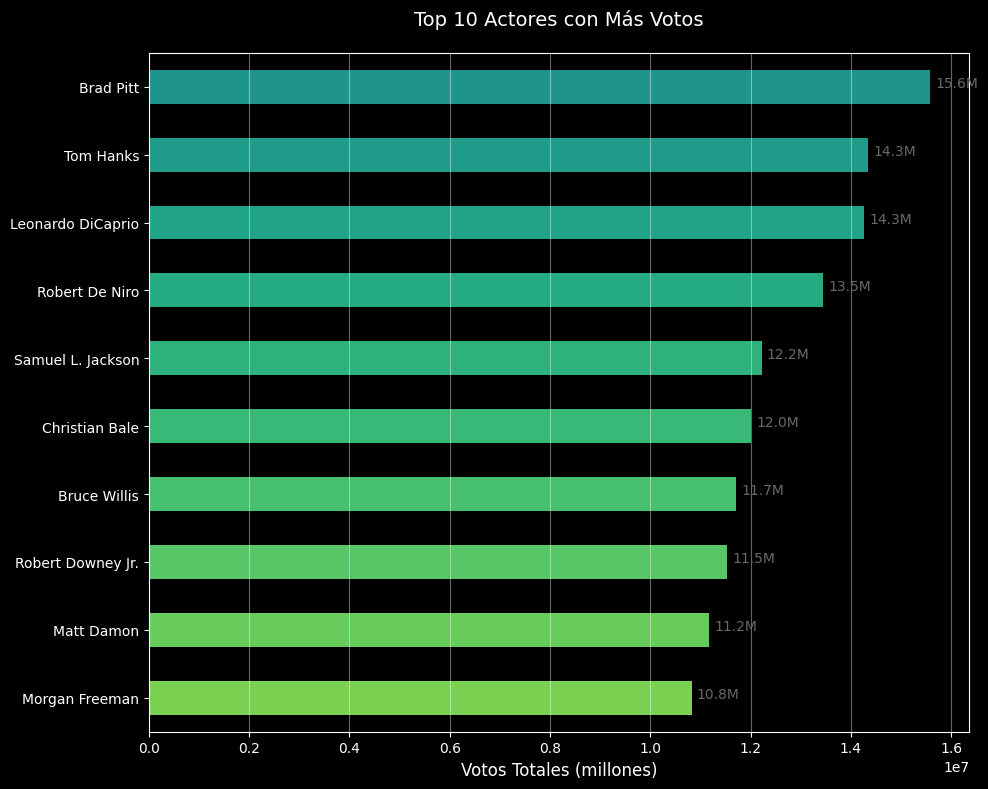

Actor con más votos: Brad Pitt (15,583,207.0 votos)



In [7]:
actor_votes = cast.groupby("name")["votes"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 8))
colors = plt.cm.viridis(np.linspace(0.8, 0.2, 20))
actor_votes.sort_values().plot(kind='barh', color=colors)
plt.title('Top 10 Actores con Más Votos', fontsize=14, pad=20)
plt.xlabel('Votos Totales (millones)', fontsize=12)
plt.ylabel('')
plt.grid(axis='x', alpha=0.4)

for i, v in enumerate(actor_votes.sort_values()):
    plt.text(v + 100000, i, f"{v/1e6:.1f}M", color='dimgrey')

plt.tight_layout()
plt.show()

most_voted_actor = actor_votes.idxmax()
print(f"Actor con más votos: {most_voted_actor} ({actor_votes.max():,} votos)\n")

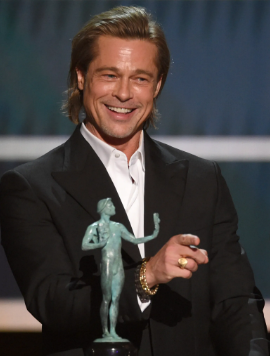

¿Qué película tiene el mayor rating a lo largo de los años?

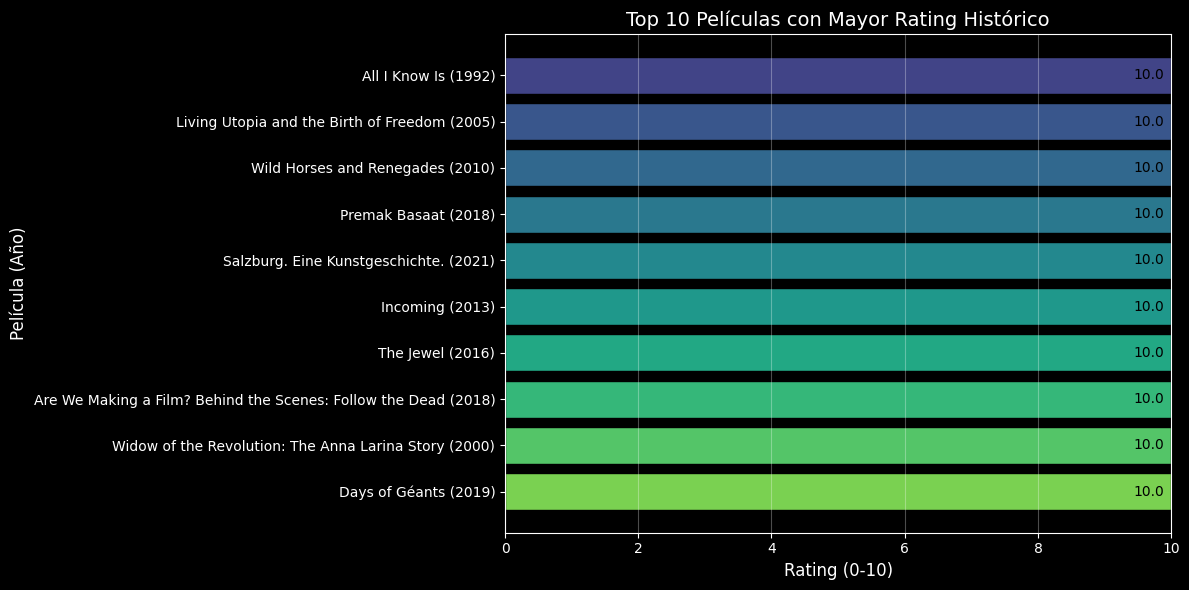

La película con mayor rating histórico es 'All I Know Is' (1992)
   - Rating: 10.0/10
   - Votos: 5


In [8]:
top_10_rated = pelis.sort_values('rating', ascending=False).head(10)

plt.figure(figsize=(12, 6))
bars = plt.barh(
    top_10_rated['title'] + ' (' + top_10_rated['year'].astype(str) + ')',
    top_10_rated['rating'],
    color=plt.cm.viridis(np.linspace(0.2, 0.8, 10)),
    edgecolor='black'
)

plt.title('Top 10 Películas con Mayor Rating Histórico', fontsize=14)
plt.xlabel('Rating (0-10)', fontsize=12)
plt.ylabel('Película (Año)', fontsize=12)
plt.xlim(0, 10)
plt.grid(axis='x', alpha=0.3)

plt.gca().invert_yaxis()

for bar in bars:
    width = bar.get_width()
    plt.text(width - 0.1, bar.get_y() + bar.get_height()/2,
             f'{width:.1f}',
             va='center', ha='right', color='black')

plt.tight_layout()
plt.show()

best_movie = top_10_rated.iloc[0]
print(f"La película con mayor rating histórico es '{best_movie['title']}' ({best_movie['year']})")
print(f"   - Rating: {best_movie['rating']:.1f}/10")
print(f"   - Votos: {best_movie['votes']:,}")

Por década indicar ¿cuál es la película con mayor rating?

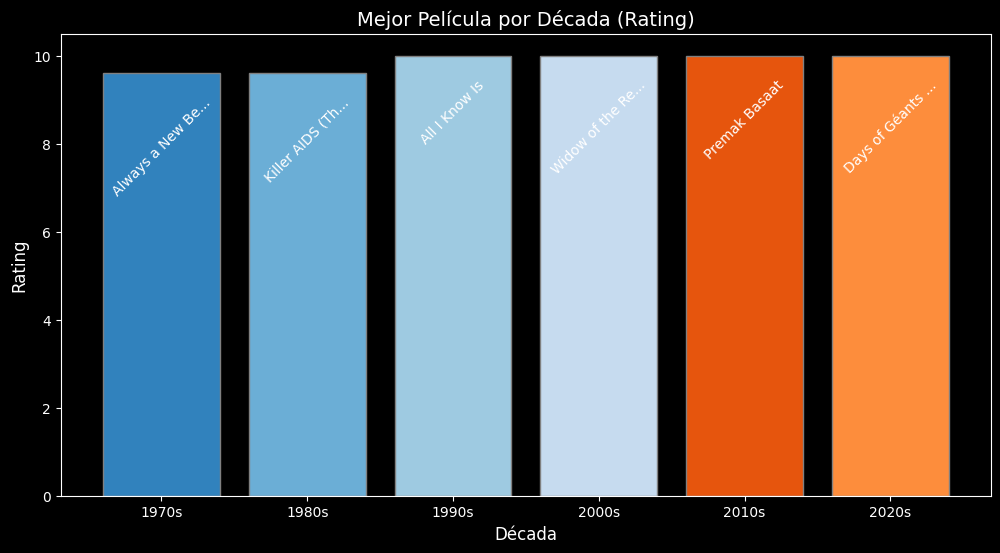

Películas con mayor rating por década:
 decade                                          title  rating
   1970                         Always a New Beginning     9.6
   1980                        Killer AIDS (The Movie)     9.6
   1990                                  All I Know Is    10.0
   2000 Widow of the Revolution: The Anna Larina Story    10.0
   2010                                  Premak Basaat    10.0
   2020                              Days of Géants II    10.0 



In [9]:
pelis["decade"] = (pelis["year"] // 10) * 10
best_decade = pelis.loc[pelis.groupby("decade")["rating"].idxmax()]

plt.figure(figsize=(12, 6))
bars = plt.bar(
    best_decade['decade'].astype(str) + 's',
    best_decade['rating'],
    color=plt.cm.tab20c.colors,
    edgecolor='grey'
)

plt.title('Mejor Película por Década (Rating)', fontsize=14)
plt.xlabel('Década', fontsize=12)
plt.ylabel('Rating', fontsize=12)

for bar, movie in zip(bars, best_decade['title']):
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height() - 0.5,
        movie[:15] + '...' if len(movie) > 15 else movie,
        rotation=45,
        ha='center',
        va='top',
        color='w'
    )

plt.show()
print("Películas con mayor rating por década:")
print(best_decade[['decade', 'title', 'rating']].to_string(index=False), '\n')

Identifica una saga de películas y determina, ¿cuál fue la más exitosa en relación a su rating y votos?

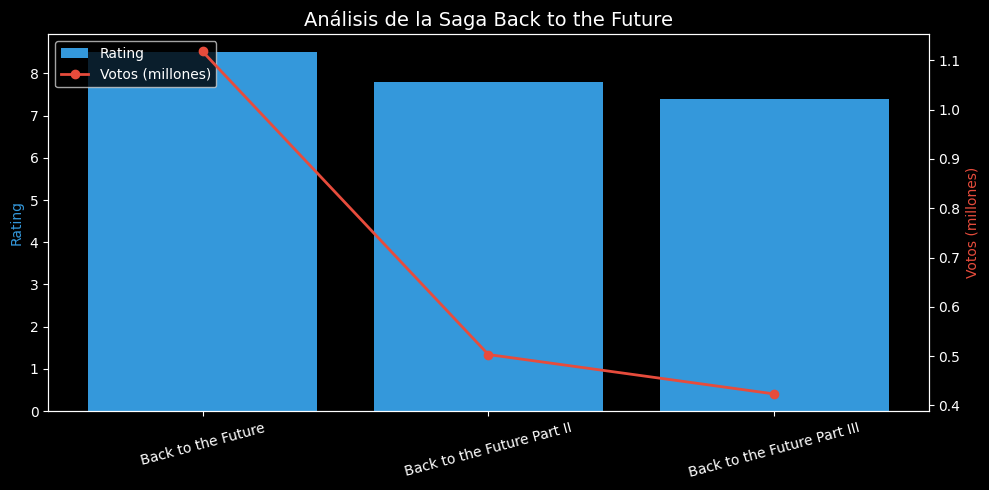

Mejor película de  la saga Back to the Future: Back to the Future (Rating: 8.5, Votos: 1,117,893)



In [10]:
saga_name = "Back to the Future"
saga_movies = pelis[pelis['title'].str.contains(saga_name, case=False)]
saga_movies = saga_movies[~saga_movies['title'].str.contains("Ivan Vasilievich", case=False)]  # Exclusión
saga_movies = saga_movies[~saga_movies['title'].str.contains("Project 88", case=False)]
if not saga_movies.empty:
    fig, ax = plt.subplots(figsize=(10, 5))

    ax.bar(
        saga_movies['title'],
        saga_movies['rating'],
        color='#3498db',
        label='Rating'
    )

    ax2 = ax.twinx()
    ax2.plot(
        saga_movies['title'],
        saga_movies['votes']/1e6,
        color='#e74c3c',
        marker='o',
        linewidth=2,
        label='Votos (millones)'
    )

    ax.set_title(f'Análisis de la Saga {saga_name}', fontsize=14)
    ax.set_ylabel('Rating', color='#3498db')
    ax2.set_ylabel('Votos (millones)', color='#e74c3c')
    ax.tick_params(axis='x', rotation=15)

    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax.legend(lines + lines2, labels + labels2, loc='upper left')

    plt.tight_layout()
    plt.show()

    best_saga = saga_movies.loc[saga_movies['rating'].idxmax()]
    print(f"Mejor película de  la saga {saga_name}: {best_saga['title']} (Rating: {best_saga['rating']}, Votos: {best_saga['votes']:,})\n")
else:
    print(f"No se encontraron películas para la saga {saga_name}\n")

¿Cuál es la película con mayor cantidad de actores?

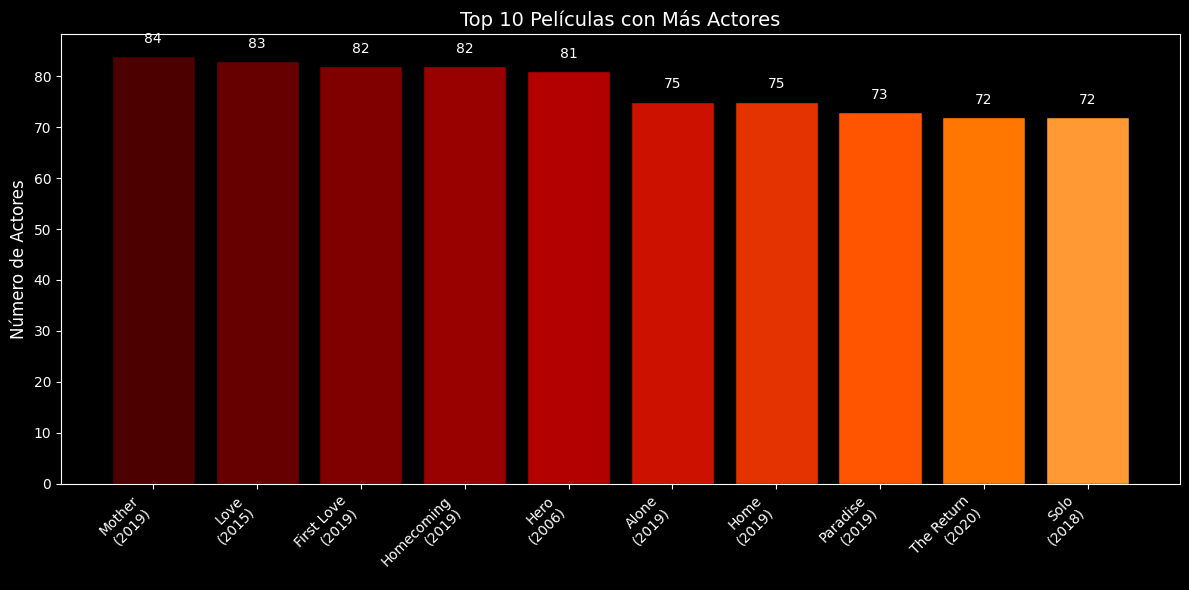


Película con más actores: Mother (2019) con 84 actores



In [11]:
actor_count = cast.groupby('title').size().sort_values(ascending=False).head(10)

pelis_top = pelis[pelis['title'].isin(actor_count.index)]
year_mapping = pelis_top.set_index('title')['year'].to_dict()

labels = [f"{title}\n({int(year_mapping.get(title, 'N/A'))})" for title in actor_count.index]

plt.figure(figsize=(12, 6))
bars = plt.bar(
    labels,
    actor_count.values,
    color=plt.cm.gist_heat(np.linspace(0.2, 0.8, len(actor_count))),
    edgecolor='black'
)

plt.title('Top 10 Películas con Más Actores', fontsize=14)
plt.xlabel('')
plt.ylabel('Número de Actores', fontsize=12)
plt.xticks(rotation=45, ha='right')

for i, v in enumerate(actor_count.values):
    plt.text(i, v + 2, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()
print(f"\nPelícula con más actores: {actor_count.index[0]} ({int(year_mapping.get(actor_count.index[0], 'N/A'))}) "
      f"con {actor_count.iloc[0]} actores\n")

Elabora un reporte con alguna gráfica segun tu criterio y gusto en relación a la información del Data set.

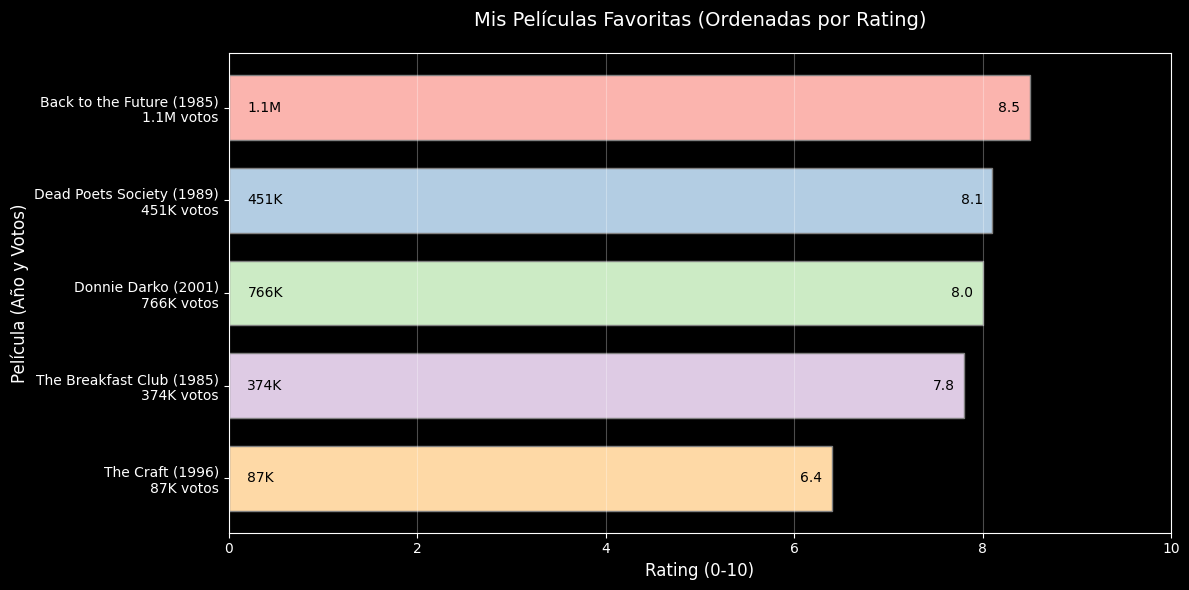

La mejor calificada es 'Back to the Future' con 8.5/10
   - Año: 1985
   - Votos: 1.1M


In [12]:
favorites = ["Back to the Future", "The Craft", "The Breakfast Club", "Dead Poets Society", "Donnie Darko"]

fav_movies = pelis[pelis['title'].isin(favorites)].copy()
fav_movies = fav_movies.sort_values('rating', ascending=False)

def format_votes(votes):
    if votes >= 1e6:
        return f"{votes/1e6:.1f}M"
    else:
        return f"{votes/1e3:.0f}K"

labels = [f"{title} ({year})\n{format_votes(votes)} votos"
          for title, year, votes in zip(fav_movies['title'],
                                      fav_movies['year'],
                                      fav_movies['votes'])]

plt.figure(figsize=(12, 6))
bars = plt.barh(
    labels,
    fav_movies['rating'],
    color=plt.cm.Pastel1(range(len(favorites))),
    edgecolor='grey',
    height=0.7
)

plt.gca().invert_yaxis()

plt.title('Mis Películas Favoritas (Ordenadas por Rating)', fontsize=14, pad=20)
plt.xlabel('Rating (0-10)', fontsize=12)
plt.ylabel('Película (Año y Votos)', fontsize=12)
plt.xlim(0, 10)
plt.grid(axis='x', alpha=0.3)

for bar, rating, votes in zip(bars, fav_movies['rating'], fav_movies['votes']):
    width = bar.get_width()

    plt.text(width - 0.1, bar.get_y() + bar.get_height()/2,
             f'{rating:.1f}',
             va='center', ha='right', color='black', fontsize=10)

    plt.text(0.2, bar.get_y() + bar.get_height()/2,
             f'{format_votes(votes)}',
             va='center', ha='left', color='black', fontsize=10)

plt.tight_layout()
plt.show()

best_rated = fav_movies.iloc[0]
print(f"La mejor calificada es '{best_rated['title']}' con {best_rated['rating']:.1f}/10")
print(f"   - Año: {best_rated['year']}")
print(f"   - Votos: {format_votes(best_rated['votes'])}")